In [53]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df_pyber = pd.merge(df_ride, df_city, on="city", how="left")

# Display the data table for preview
df_pyber.info()
df_pyber.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
driver_count    2375 non-null int64
type            2375 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [49]:
#df_pyber[df_pyber['city'] == 'Lake Jonathanshire']

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
76,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
154,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
185,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
196,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
277,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
329,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
497,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
693,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
712,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


## Bubble Plot of Ride Sharing Data

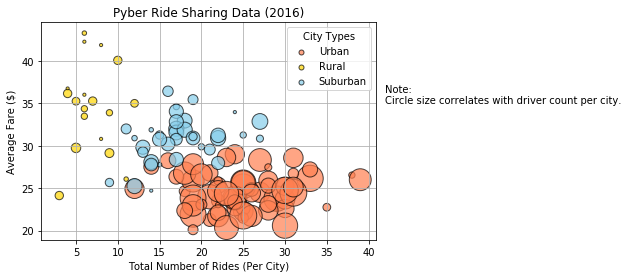

In [187]:
# Obtain the x and y coordinates for each of the three city types

#Build groupby data set for each city type
city_urban = df_pyber[df_pyber["type"] == "Urban"]
city_urban = city_urban.groupby(["city"])

city_rural = df_pyber[df_pyber["type"] == "Rural"]
city_rural = city_rural.groupby(["city"])

city_suburban = df_pyber[df_pyber["type"] == "Suburban"]
city_suburban = city_suburban.groupby(["city"])

# Calculate [x = total ride count, y = average fare, s = Sum driver count] for each city type

#Build x coordinate(Rides per city) for each city type
x_city_urban = city_urban["ride_id"].count()
x_city_rural = city_rural["ride_id"].count()
x_city_suburban = city_suburban["ride_id"].count()

#Build y coordinate(Average Fare) for each city type
y_city_urban = city_urban["fare"].mean()
y_city_rural = city_rural["fare"].mean()
y_city_suburban = city_suburban["fare"].mean()

#Build s (Mean Driver count) for each city type
s_city_urban = city_urban["driver_count"].mean()
s_city_rural = city_rural["driver_count"].mean()
s_city_suburban = city_suburban["driver_count"].mean()


# Build the scatter plots for each city types
fig, ax = plt.subplots()
ax.scatter(x_city_urban, y_city_urban, s=s_city_urban * 10,
           c="coral", edgecolor="black",label="Urban",marker='o', alpha=0.7)
ax.scatter(x_city_rural, y_city_rural, s=s_city_rural * 10,
           c="gold", edgecolor="black",label="Rural",marker='o', alpha=0.7)
ax.scatter(x_city_suburban, y_city_suburban, s=s_city_suburban * 10,
           c="skyblue", edgecolor="black",label="Suburban",marker='o', alpha=0.7)
plt.grid()


# Incorporate the other graph properties
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = ax.legend(fontsize = 10, title= "City Types")

for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([25])

# Incorporate a text label regarding circle size
ax.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
fig.savefig("PyberRideSharingData.png",bbox_inches="tight",dpi = 150)

plt.show()

## Total Fares by City Type

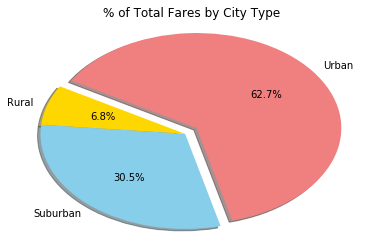

In [186]:
# Calculate Type Percents
type_cities = df_pyber.groupby("type")
total_fare = type_cities["fare"].sum()

labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1) 
colors = ["gold", "skyblue", "lightcoral"]

# Build Pie Chart
fig, ax = plt.subplots()
ax.pie(total_fare, explode=explode,colors=colors, labels=labels,autopct="%1.1f%%",
        shadow=True, startangle=150)
ax.set_title("% of Total Fares by City Type")
ax.axis('auto')

# Save Figure
fig.savefig("TotalFaresByCity.png",bbox_inches="tight",dpi = 150)

plt.show()

## Total Rides by City Type

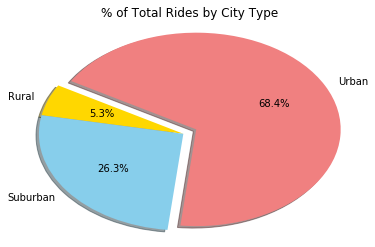

In [222]:
# Calculate Ride Percents
type_cities = df_pyber.groupby("type")
total_rides = type_cities["ride_id"].count()

labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1) 
colors = ["gold", "skyblue", "lightcoral"]

# Build Pie Chart
fig, ax = plt.subplots()
ax.pie(total_rides, explode=explode,colors=colors, labels=labels,autopct="%1.1f%%",
        shadow=True, startangle=150)
ax.set_title("% of Total Rides by City Type")
ax.axis('auto')

# Save Figure
fig.savefig("TotalRidesByCity.png",bbox_inches="tight",dpi = 150)

plt.show()

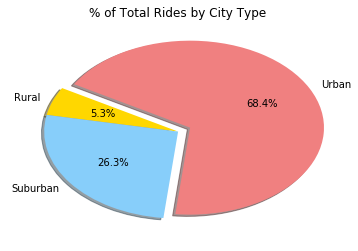

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

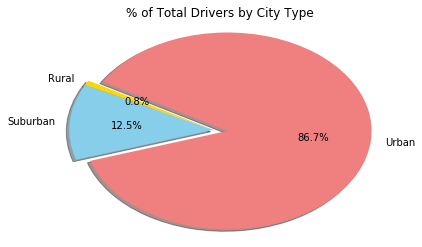

In [221]:
# Calculate Driver Percents
df_pyber.head()
driver_data = df_pyber.groupby(["type"])
driver_data = driver_data["driver_count"].sum()

labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1) 
colors = ["gold", "skyblue", "lightcoral"]

# Build Pie Chart
fig, ax = plt.subplots()
ax.pie(driver_data, explode=explode,colors=colors, labels=labels,autopct="%1.1f%%",
        shadow=True, startangle=150)
ax.set_title("% of Total Drivers by City Type")
ax.axis('auto')

# Save Figure
fig.savefig("TotalDriversByCity.png",bbox_inches="tight",dpi = 150)

plt.show()

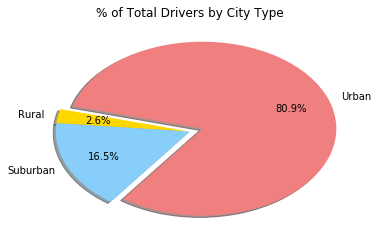

In [6]:
# Show Figure
plt.show()